In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## Import of libraries

In [24]:
import os
import numpy as np
import pandas as pd 

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt 
from pandas.plotting import scatter_matrix

# Scalers
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Data processing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import cross_val_score, KFold

# Metrics
from sklearn.metrics import mean_squared_error, confusion_matrix, plot_confusion_matrix, classification_report

# Classification libraries
from sklearn.naive_bayes import CategoricalNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier

# XGBoost
import xgboost as xgb

## Plotting settings

In [25]:
# Notebook style plotting
%matplotlib notebook

# Fefault colourpalette
color_paletten = sns.color_palette()

# Set theme for plotting with seaborn
theme = sns.set_theme(style='whitegrid', palette=color_paletten)

## Import of data

In [26]:
# Change directory
os.chdir('/kaggle/input/nasa-asteroids-classification/')

In [27]:
# Read .csv file into DataFrame
datan = pd.read_csv('nasa.csv')

## Data exploration

In [28]:
datan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4687 entries, 0 to 4686
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Neo Reference ID              4687 non-null   int64  
 1   Name                          4687 non-null   int64  
 2   Absolute Magnitude            4687 non-null   float64
 3   Est Dia in KM(min)            4687 non-null   float64
 4   Est Dia in KM(max)            4687 non-null   float64
 5   Est Dia in M(min)             4687 non-null   float64
 6   Est Dia in M(max)             4687 non-null   float64
 7   Est Dia in Miles(min)         4687 non-null   float64
 8   Est Dia in Miles(max)         4687 non-null   float64
 9   Est Dia in Feet(min)          4687 non-null   float64
 10  Est Dia in Feet(max)          4687 non-null   float64
 11  Close Approach Date           4687 non-null   object 
 12  Epoch Date Close Approach     4687 non-null   int64  
 13  Rel

In [29]:
print(datan.isnull().sum())

Neo Reference ID                0
Name                            0
Absolute Magnitude              0
Est Dia in KM(min)              0
Est Dia in KM(max)              0
Est Dia in M(min)               0
Est Dia in M(max)               0
Est Dia in Miles(min)           0
Est Dia in Miles(max)           0
Est Dia in Feet(min)            0
Est Dia in Feet(max)            0
Close Approach Date             0
Epoch Date Close Approach       0
Relative Velocity km per sec    0
Relative Velocity km per hr     0
Miles per hour                  0
Miss Dist.(Astronomical)        0
Miss Dist.(lunar)               0
Miss Dist.(kilometers)          0
Miss Dist.(miles)               0
Orbiting Body                   0
Orbit ID                        0
Orbit Determination Date        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Epoch Osculation                0
Eccentricity                    0
Semi Major Axis                 0
Inclination   

In [30]:
datan.head()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion,Equinox,Hazardous
0,3703080,3703080,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551,J2000,True
1,3723955,3723955,21.3,0.146068,0.326618,146.067964,326.617897,0.090762,0.202951,479.225620,...,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330,J2000,False
2,2446862,2446862,20.3,0.231502,0.517654,231.502122,517.654482,0.143849,0.321655,759.521423,...,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371,J2000,True
3,3092506,3092506,27.4,0.008801,0.019681,8.801465,19.680675,0.005469,0.012229,28.876199,...,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277,J2000,False
4,3514799,3514799,21.6,0.127220,0.284472,127.219879,284.472297,0.079051,0.176763,417.388066,...,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395,J2000,True


In [31]:
datan.describe()

,Neo Reference ID,Name,Absolute Magnitude,Est Dia in KM(min),Est Dia in KM(max),Est Dia in M(min),Est Dia in M(max),Est Dia in Miles(min),Est Dia in Miles(max),Est Dia in Feet(min),...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
count,4.687000e+03,4.687000e+03,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,...,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4.687000e+03,4687.000000,4687.000000
mean,3.272298e+06,3.272298e+06,22.267865,0.204604,0.457509,204.604203,457.508906,0.127135,0.284283,671.273653,...,1.400264,13.373844,172.157275,635.582076,0.813383,183.932151,1.987144,2.457728e+06,181.167927,0.738242
std,5.486011e+05,5.486011e+05,2.890972,0.369573,0.826391,369.573402,826.391249,0.229642,0.513496,1212.511199,...,0.524154,10.936227,103.276777,370.954727,0.242059,103.513035,0.951519,9.442264e+02,107.501623,0.342627
min,2.000433e+06,2.000433e+06,11.160000,0.001011,0.002260,1.010543,2.259644,0.000628,0.001404,3.315431,...,0.615920,0.014513,0.001941,176.557161,0.080744,0.006918,0.803765,2.450100e+06,0.003191,0.086285
25%,3.097594e+06,3.097594e+06,20.100000,0.033462,0.074824,33.462237,74.823838,0.020792,0.046493,109.784247,...,1.000635,4.962341,83.081208,365.605031,0.630834,95.625916,1.266059,2.457815e+06,87.006918,0.453289
50%,3.514799e+06,3.514799e+06,21.900000,0.110804,0.247765,110.803882,247.765013,0.068850,0.153954,363.529809,...,1.240981,10.311836,172.625393,504.947292,0.833153,189.761641,1.618195,2.457973e+06,185.718889,0.712946
75%,3.690060e+06,3.690060e+06,24.500000,0.253837,0.567597,253.837029,567.596853,0.157727,0.352688,832.798679,...,1.678364,19.511681,255.026909,794.195972,0.997227,271.777557,2.451171,2.458108e+06,276.531946,0.984669
max,3.781897e+06,3.781897e+06,32.100000,15.579552,34.836938,15579.552413,34836.938254,9.680682,21.646663,51114.018738,...,5.072008,75.406667,359.905890,4172.231343,1.299832,359.993098,8.983852,2.458839e+06,359.917991,2.039000


In [32]:
datan['Hazardous'].describe()

count      4687
unique        2
top       False
freq       3932
Name: Hazardous, dtype: object

In [33]:
datan.nunique()

Neo Reference ID                3692
Name                            3692
Absolute Magnitude               269
Est Dia in KM(min)               269
Est Dia in KM(max)               269
Est Dia in M(min)                269
Est Dia in M(max)                269
Est Dia in Miles(min)            269
Est Dia in Miles(max)            269
Est Dia in Feet(min)             269
Est Dia in Feet(max)             269
Close Approach Date              777
Epoch Date Close Approach        777
Relative Velocity km per sec    4687
Relative Velocity km per hr     4687
Miles per hour                  4687
Miss Dist.(Astronomical)        4673
Miss Dist.(lunar)               4660
Miss Dist.(kilometers)          4661
Miss Dist.(miles)               4660
Orbiting Body                      1
Orbit ID                         188
Orbit Determination Date        2680
Orbit Uncertainity                10
Minimum Orbit Intersection      3678
Jupiter Tisserand Invariant     2495
Epoch Osculation                 429
E

In [34]:
datan['Orbiting Body'].unique()

array(['Earth'], dtype=object)

In [35]:
datan['Equinox'].unique()

array(['J2000'], dtype=object)

In [36]:
datan['Close Approach Date'].unique()

array(['1995-01-01', '1995-01-08', '1995-01-15', '1995-01-22',
       '1995-02-08', '1995-02-15', '1995-02-22', '1995-03-08',
       '1995-03-15', '1995-03-22', '1995-04-08', '1995-04-15',
       '1995-04-22', '1995-05-08', '1995-05-15', '1995-05-22',
       '1995-06-08', '1995-06-15', '1995-06-22', '1995-07-08',
       '1995-07-15', '1995-07-22', '1995-08-08', '1995-08-15',
       '1995-08-22', '1995-09-08', '1995-09-15', '1995-09-22',
       '1995-10-08', '1995-10-15', '1995-10-22', '1995-11-08',
       '1995-11-15', '1995-11-22', '1995-12-08', '1995-12-15',
       '1995-12-22', '1996-01-08', '1996-01-15', '1996-01-22',
       '1996-02-08', '1996-02-15', '1996-02-22', '1996-03-08',
       '1996-03-22', '1996-04-08', '1996-04-15', '1996-04-22',
       '1996-05-08', '1996-05-15', '1996-05-22', '1996-06-08',
       '1996-06-15', '1996-06-22', '1996-07-08', '1996-07-15',
       '1996-07-22', '1996-08-08', '1996-08-15', '1996-08-22',
       '1996-09-08', '1996-09-15', '1996-09-22', '1996-

In [37]:
datan['Orbit Determination Date'].unique()

array(['2017-04-06 08:36:37', '2017-04-06 08:32:49',
       '2017-04-06 09:20:19', ..., '2017-04-06 08:23:43',
       '2017-04-06 08:23:42', '2017-04-29 06:18:33'], dtype=object)

## Selection of features

### Dropping redundant features

In [38]:
# Neo Reference ID and Name are redundant as identifier, drop Name, set Neo Reference ID as index
datan.set_index(['Neo Reference ID'], drop=True)
datan.drop(['Name'], axis=1, inplace=True)

In [39]:
# Orbiting Body and Equinox are the same for all rows, does not provide any information and can be dropped
datan.drop(['Orbiting Body'], axis=1, inplace=True)
datan.drop(['Equinox'], axis=1, inplace=True)

In [40]:
# Close Approach Date and Orbit Determination Date are difficult to handle as numerical data, dropped
datan.drop(['Close Approach Date'], axis=1, inplace=True)
datan.drop(['Orbit Determination Date'], axis=1, inplace=True)

In [41]:
# Estimated Min and Max Diamater in kilometer, meter, miles and feet. These are redundant and only one unit is needed.
# Keeping Min and Max Diameter in meter, while droppping the others.

datan.drop(['Est Dia in KM(min)'], axis=1, inplace=True)
datan.drop(['Est Dia in KM(max)'], axis=1, inplace=True)
datan.drop(['Est Dia in Miles(min)'], axis=1, inplace=True)
datan.drop(['Est Dia in Miles(max)'], axis=1, inplace=True)
datan.drop(['Est Dia in Feet(min)'], axis=1, inplace=True)
datan.drop(['Est Dia in Feet(max)'], axis=1, inplace=True)

In [42]:
# Relative Velocity km per sec and hour, and Miles per hour redundant, choosing to keep Km/Sec, dropping other.
datan.drop(['Relative Velocity km per hr'], axis=1, inplace=True)
datan.drop(['Miles per hour'], axis=1, inplace=True)

In [43]:
# Miss Dist in units: (Astronomical), (lunar), (kilometers), (miles). 
# Not exact same number of unique values ( and the unique values might not be the same),
# So not redundant, but number of unique values similar, For this choosing to keep the unit with most unique values:
# (Astronomical), while dropping the other.
datan.drop(['Miss Dist.(lunar)'], axis=1, inplace=True)
datan.drop(['Miss Dist.(kilometers)'], axis=1, inplace=True)
datan.drop(['Miss Dist.(miles)'], axis=1, inplace=True)

In [44]:
# Reset index and set as Neo Reference ID again
datan.reset_index(drop=True)
datan.set_index('Neo Reference ID', inplace=True)

### Selection of X

In [45]:
# Dropping column with labels, rest of columns as features in X
X = datan.drop(['Hazardous'], axis=1)
print(X.columns)
X.head()

Index(['Absolute Magnitude', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Miss Dist.(Astronomical)', 'Orbit ID', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion'],
      dtype='object')


,Absolute Magnitude,Est Dia in M(min),Est Dia in M(max),Epoch Date Close Approach,Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit ID,Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,...,Semi Major Axis,Inclination,Asc Node Longitude,Orbital Period,Perihelion Distance,Perihelion Arg,Aphelion Dist,Perihelion Time,Mean Anomaly,Mean Motion
Neo Reference ID,,,,,,,,,,,,,,,,,,,,,
3703080,21.6,127.219879,284.472297,788947200000,6.115834,0.419483,17,5,0.025282,4.634,...,1.407011,6.025981,314.373913,609.599786,0.808259,57.257470,2.005764,2.458162e+06,264.837533,0.590551
3723955,21.3,146.067964,326.617897,788947200000,18.113985,0.383014,21,3,0.186935,5.457,...,1.107776,28.412996,136.717242,425.869294,0.718200,313.091975,1.497352,2.457795e+06,173.741112,0.845330
2446862,20.3,231.502122,517.654482,789552000000,7.590711,0.050956,22,0,0.043058,4.557,...,1.458824,4.237961,259.475979,643.580228,0.950791,248.415038,1.966857,2.458120e+06,292.893654,0.559371
3092506,27.4,8.801465,19.680675,790156800000,11.173874,0.285322,7,6,0.005512,5.093,...,1.255903,7.905894,57.173266,514.082140,0.983902,18.707701,1.527904,2.457902e+06,68.741007,0.700277
3514799,21.6,127.219879,284.472297,790156800000,9.840831,0.407832,25,1,0.034798,5.154,...,1.225615,16.793382,84.629307,495.597821,0.967687,158.263596,1.483543,2.457814e+06,135.142133,0.726395


### Selection of y

In [46]:
# Selection of column with labels to y
y = datan['Hazardous']
le = LabelEncoder()
y = le.fit_transform(y=y)
y

array([1, 0, 1, ..., 0, 0, 0])

## Visualisation - data exploration

### Histograms of features in X

<IPython.core.display.Javascript object>


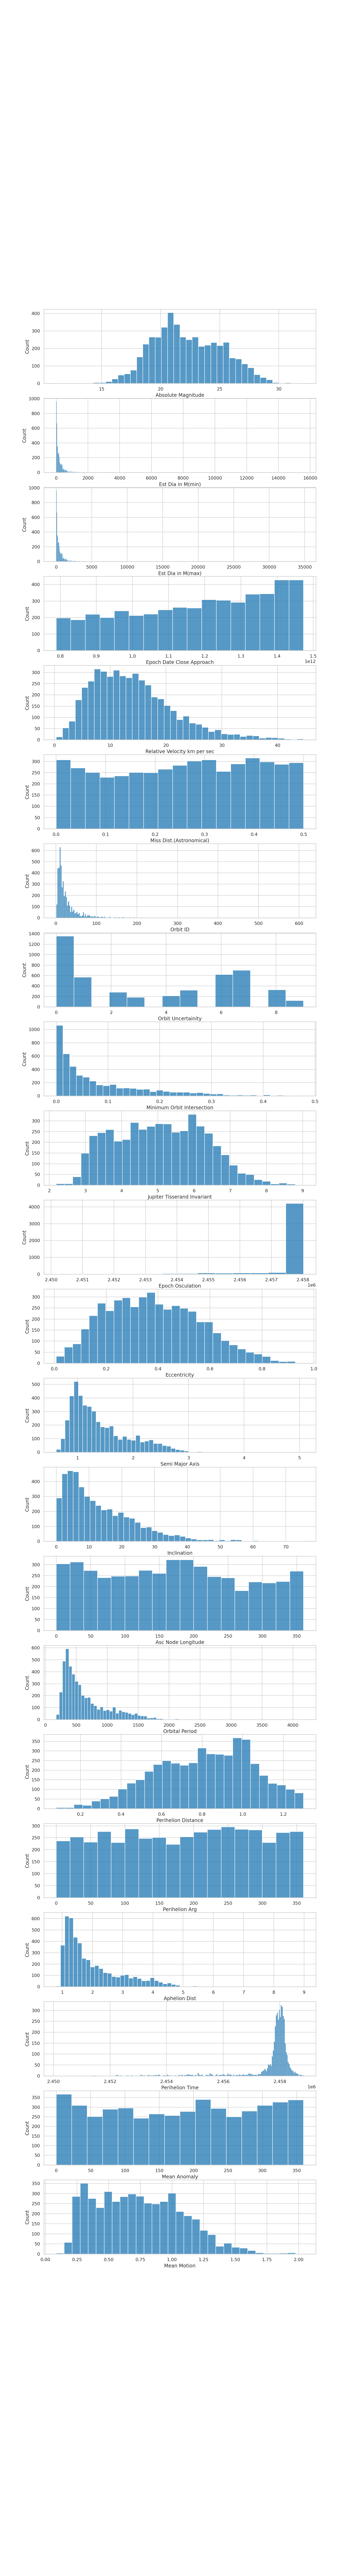

In [50]:
column_count = X.shape[1]

fig, axes = plt.subplots(column_count,1, figsize=(12, 4*column_count))

for (features, colname) in enumerate(X):
    sns.histplot(ax=axes[features], x=colname, data=X)

In [48]:
#grid = sns.PairGrid(data=datan, height = 0.4)

# Map different plots to different sections
#grid = grid.map_upper(sns.pointplot, color = 'darkblue')
#grid = grid.map_lower(sns.kdeplot, cmap = 'Blues', fill=True)
#grid = grid.map_diag(plt.hist, bins = 10, color = 'darkblue', edgecolor = 'b')

### Correlation plot of LINEAR correlations of all used data

<IPython.core.display.Javascript object>


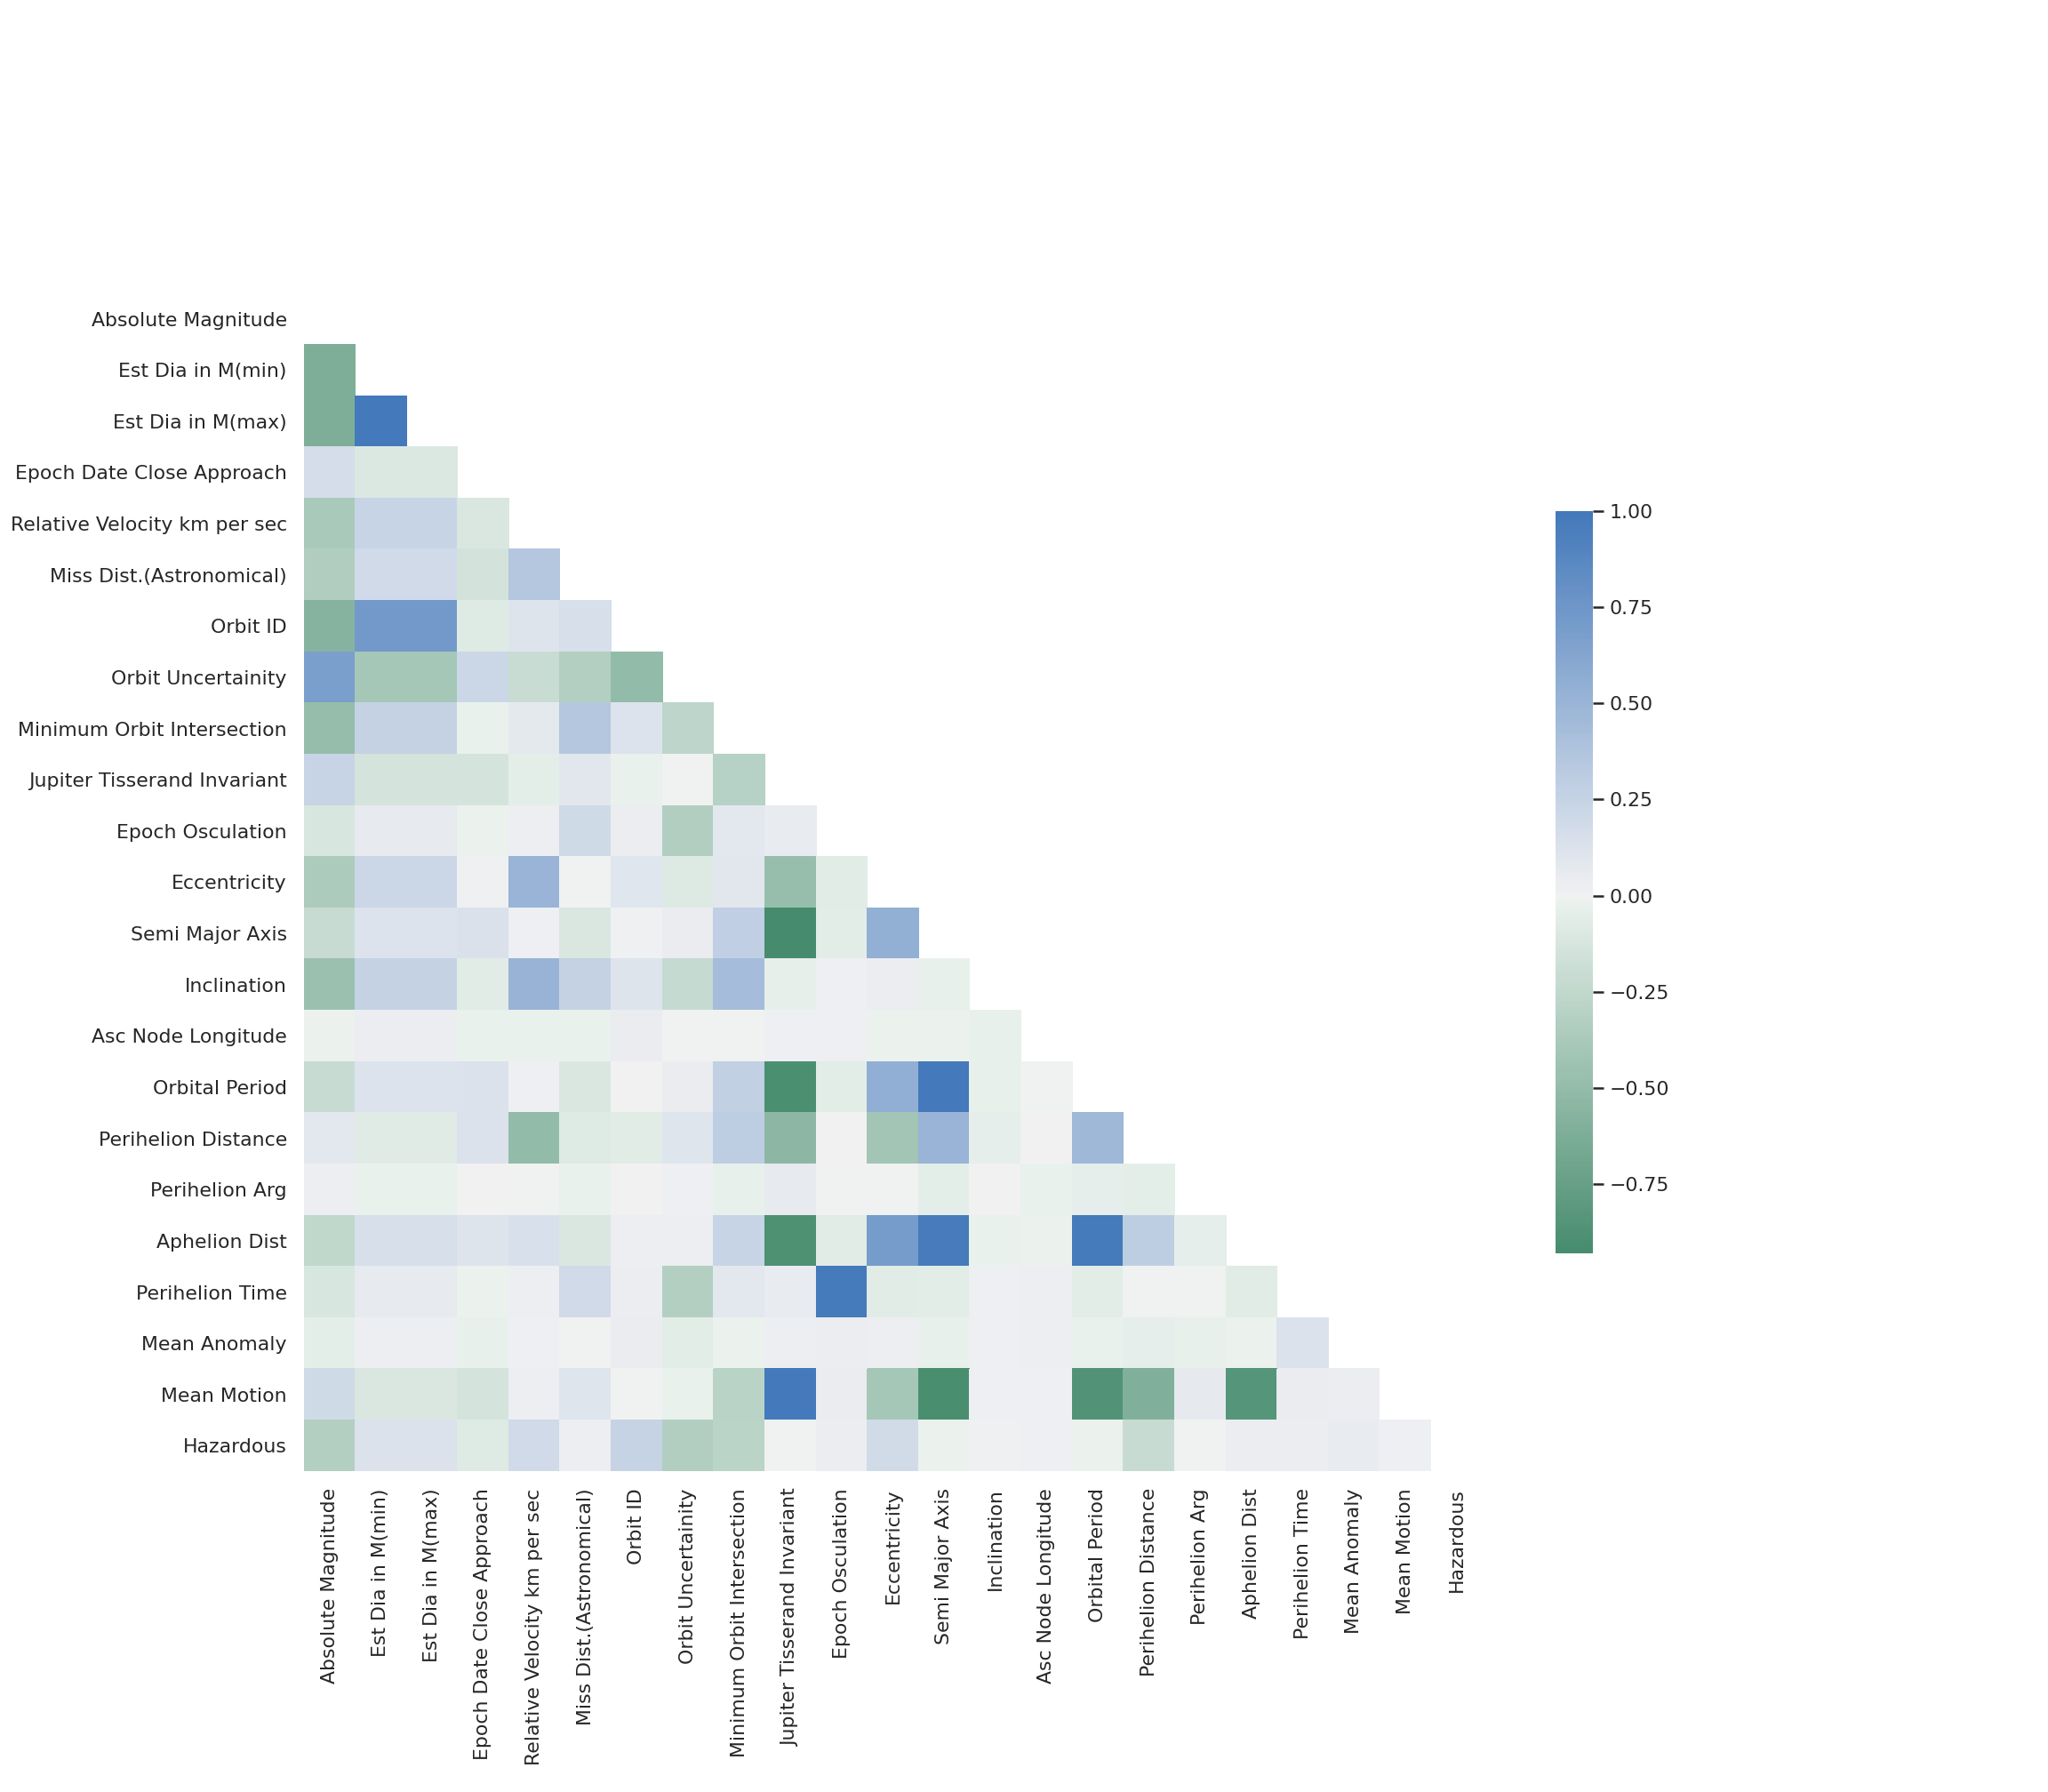

<AxesSubplot:>

In [51]:
corr = datan.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axes = plt.subplots(figsize=(16, 14))
fig.tight_layout(pad=12)

colormap = sns.diverging_palette(150, 250, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=colormap, vmax=1.0, center=0,
            square=True, cbar_kws={"shrink": .6})

# Classification

## Pre-processing

### Parameters

In [52]:
# How to select data for k-folds cross-validation
kfold = KFold(n_splits=10, shuffle=True)

#from sklearn.utils.class_weight import compute_class_weight
#classes = np.unique(y)
#weight_unbal = compute_class_weight(class_weight = 'balanced', classes = classes, y=y)
#weight_unbal

### Splitting of data into train and test sets

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=14)

### Creating Objects of scalers

In [54]:
scaler_mm_X = MinMaxScaler()
#scaler_mm_y = MinMaxScaler()

scaler_ss_X = StandardScaler()
#scaler_ss_y = StandardScaler()

### Min-max normalization

In [55]:
X_train_n = scaler_mm_X.fit_transform(X_train)
#y_train_n = scaler_mm_y.fit_transform(y_train.reshape(-1, 1))
X_test_n = scaler_mm_X.transform(X_test)
#y_test_n = scaler_mm_y.transform(y_test.reshape(-1, 1))

#y_train_n = y_train_n.ravel()
#y_test_n = y_test_n.ravel()

### Z-score Normalization

In [56]:
X_train_s = scaler_ss_X.fit_transform(X_train)
#y_train_s = scaler_ss_y.fit_transform(y_train.reshape(-1, 1))
X_test_s = scaler_ss_X.transform(X_test)
#y_test_s = scaler_ss_y.transform(y_test.reshape(-1, 1))

#y_train_s = y_train_s.ravel()
#y_test_s = y_test_s.ravel()

## Train and Evaluate models

### Naive Bayes classification

#### Fit on training data and predict on test data

In [57]:
#nb_classifier = CategoricalNB()

#nb_classifier.fit(X_train, y_train)

#y_hat_nb = nb_classifier.predict(X_test)

# !Failed due to not enough memory available

#### Classification report

In [58]:
#class_report = classification_report(y_test, y_hat_knn, output_dict=True)
#pd.DataFrame(class_report)

#### Confusion matrix

In [59]:
#plt.rcParams['figure.figsize'] = [6, 6]

#fig, ax = plt.subplots()

#cm = confusion_matrix(y_test, y_hat_nb)

#sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

#ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
#ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

#plt.show()

#### Cross-validation

In [60]:
#nb_score = cross_val_score(nb_classifier, X_test, y_test, cv=kfold, scoring = 'f1_weighted')
#nb_scores = nb_score.mean()
#nb_scores

### K-nearest neighbors Classification

#### Fit on training data and predict on test data

In [61]:
n_neigh = 3

knn_classifier = KNeighborsClassifier(n_neighbors = n_neigh)

knn_classifier.fit(X_train_n, y_train)

y_hat_knn = knn_classifier.predict(X_test_n)

#### Classification report

In [62]:
class_report = classification_report(y_test, y_hat_knn, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.907975,0.691057,0.879531,0.799516,0.870974
recall,0.951157,0.531250,0.879531,0.741203,0.879531
f1-score,0.929065,0.600707,0.879531,0.764886,0.873055
support,778.000000,160.000000,0.879531,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


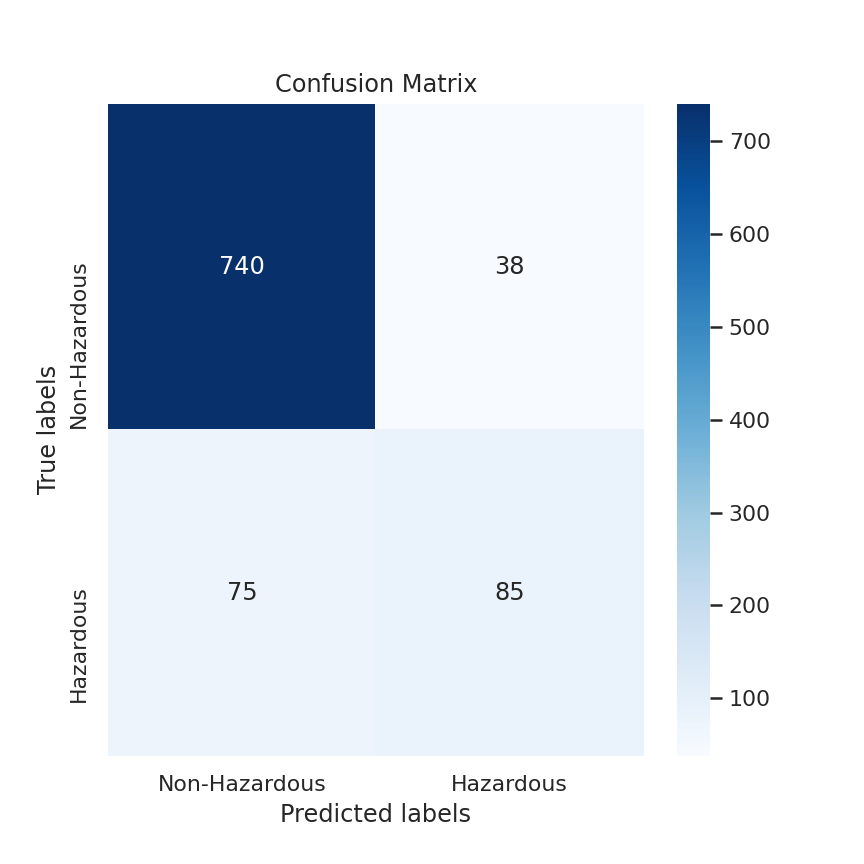

In [63]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_knn)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [93]:
knn_score = cross_val_score(knn_classifier, X_train_n, y_train, cv=kfold, scoring='f1_weighted')
knn_scores = knn_score.mean()
knn_scores

0.870765694672359

### Logistic regression Classification

#### Fit on training data and predict on test data

In [65]:
lr_classifier = LogisticRegression(class_weight='balanced',  max_iter = 200)

lr_classifier.fit(X_train_s, y_train)

y_hat_lr = lr_classifier.predict(X_test_s)

#### Classification report

In [66]:
class_report = classification_report(y_test, y_hat_lr, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.993197,0.763547,0.943497,0.878372,0.954024
recall,0.938303,0.968750,0.943497,0.953527,0.943497
f1-score,0.964970,0.853994,0.943497,0.909482,0.946040
support,778.000000,160.000000,0.943497,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


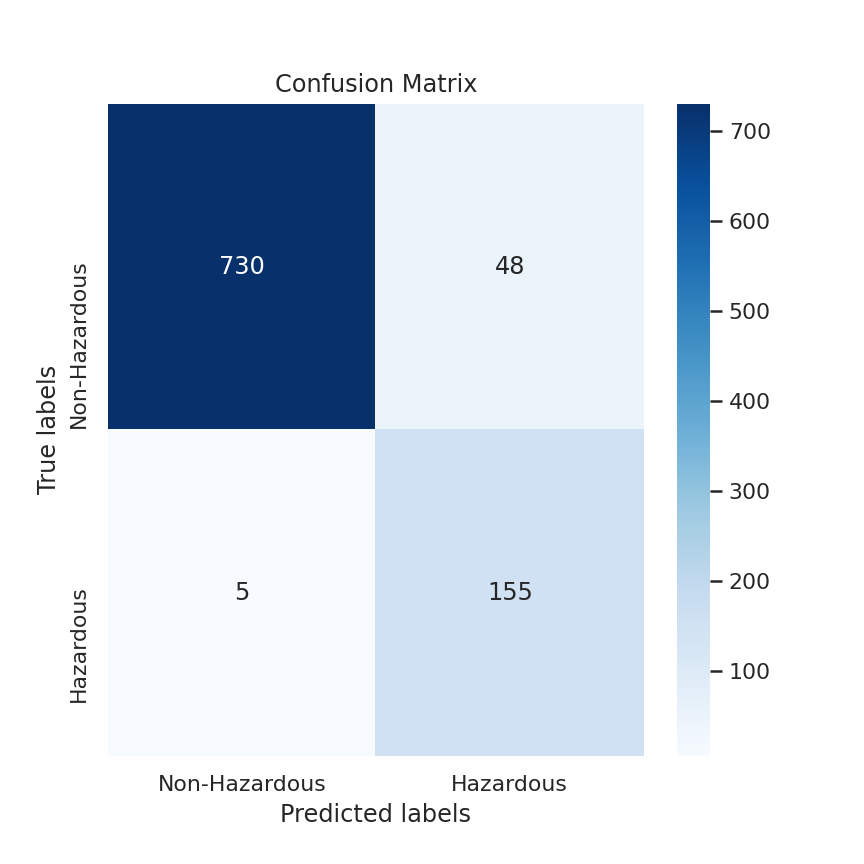

In [67]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_lr)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [94]:
lr_score = cross_val_score(lr_classifier, X_train_s, y_train, cv=kfold, scoring='f1_weighted')
lr_scores = lr_score.mean()
lr_scores

0.9288870641457718

### C-support vector Classification

#### Fit on training data and predict on test data

In [69]:
svm_classifier = SVC(class_weight='balanced')

svm_classifier.fit(X_train_s, y_train)

y_hat_svm = svm_classifier.predict(X_test_s)

#### Classification report

In [70]:
class_report = classification_report(y_test, y_hat_svm, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.995822,0.713636,0.929638,0.854729,0.947688
recall,0.919023,0.981250,0.929638,0.950137,0.929638
f1-score,0.955882,0.826316,0.929638,0.891099,0.933781
support,778.000000,160.000000,0.929638,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


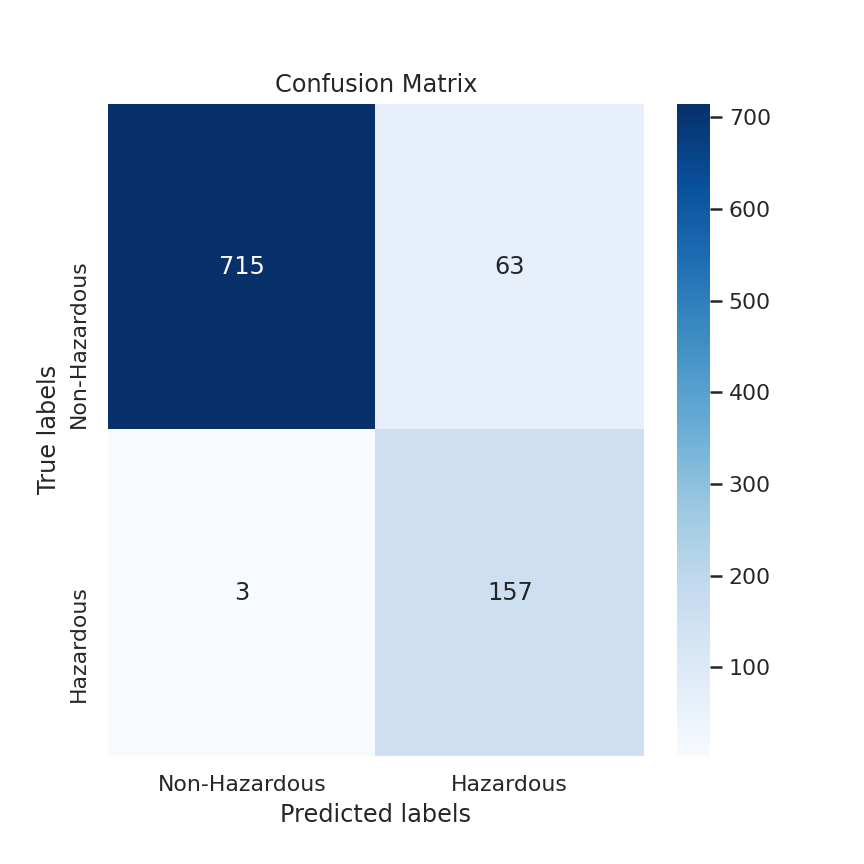

In [71]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_svm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [95]:
svm_score = cross_val_score(svm_classifier, X_train_s, y_train, cv=kfold, scoring='f1_weighted')
svm_scores = svm_score.mean()
svm_scores

0.9213457880167789

### Decision tree Classification

#### Fit on training data and predict on test data

In [73]:
dt_classifier = DecisionTreeClassifier(max_depth = None, class_weight='balanced')
# worse cross-vals score with: class_weight = weight_unbal

dt_classifier.fit(X_train, y_train)

y_hat_dt = dt_classifier.predict(X_test)

#### Classification report

In [74]:
class_report = classification_report(y_test, y_hat_dt, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.992347,1.000000,0.993603,0.996173,0.993652
recall,1.000000,0.962500,0.993603,0.981250,0.993603
f1-score,0.996159,0.980892,0.993603,0.988525,0.993555
support,778.000000,160.000000,0.993603,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


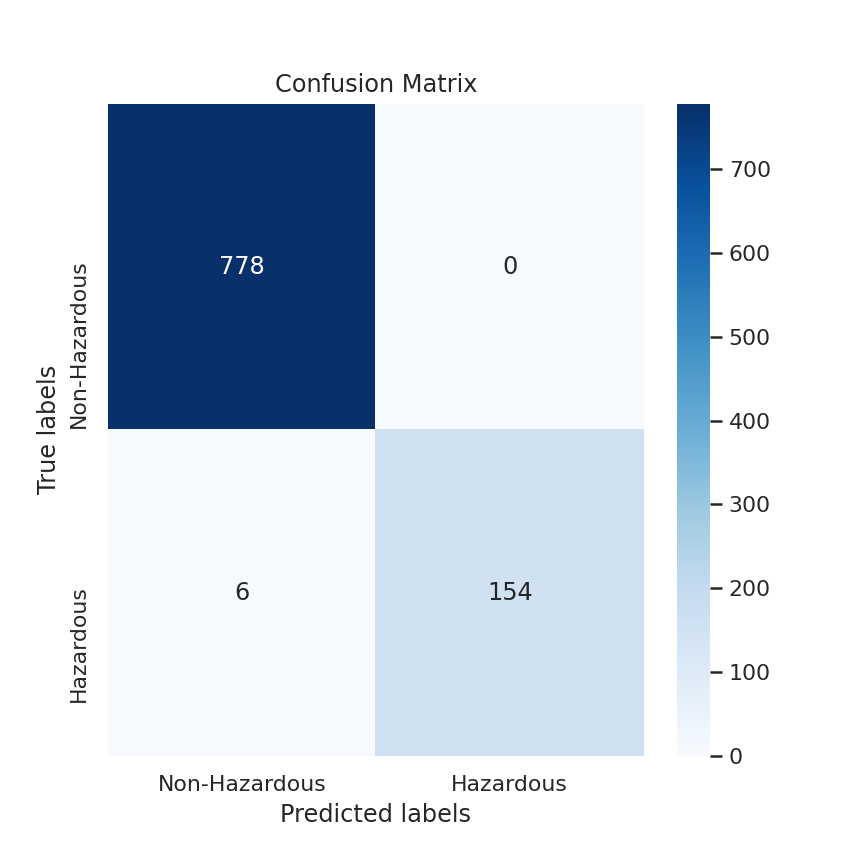

In [75]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_dt)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [96]:
dt_score = cross_val_score(dt_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')
dt_scores = dt_score.mean()
dt_scores

0.996515299565289

### Random forest Classification

#### Fit on training data and predict on test data

In [77]:
rf_classifier = RandomForestClassifier(max_depth = None, n_estimators = 100, class_weight='balanced')

rf_classifier.fit(X_train, y_train)

y_hat_rf = rf_classifier.predict(X_test)

#### Classification report

In [78]:
class_report = classification_report(y_test, y_hat_rf, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.993614,1.000000,0.99467,0.996807,0.994704
recall,1.000000,0.968750,0.99467,0.984375,0.994670
f1-score,0.996797,0.984127,0.99467,0.990462,0.994636
support,778.000000,160.000000,0.99467,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


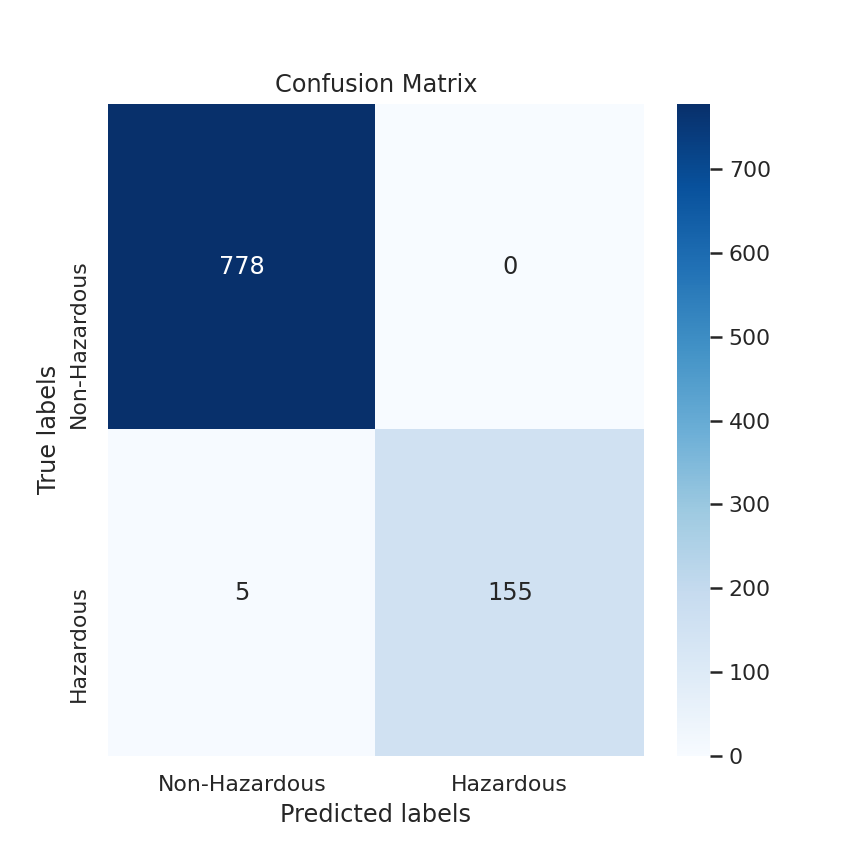

In [79]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_rf)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [97]:
rf_score = cross_val_score(rf_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')
rf_scores = rf_score.mean()
rf_scores

0.9951875851709395

### Extra trees Classifier 

#### Fit on training data and predict on test data

In [81]:
et_classifier = ExtraTreesClassifier(max_depth = None, n_estimators = 100, class_weight='balanced')

et_classifier.fit(X_train, y_train)

y_hat_et = et_classifier.predict(X_test)

#### Classification report

In [82]:
class_report = classification_report(y_test, y_hat_et, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.973717,1.000000,0.977612,0.986859,0.978200
recall,1.000000,0.868750,0.977612,0.934375,0.977612
f1-score,0.986684,0.929766,0.977612,0.958225,0.976975
support,778.000000,160.000000,0.977612,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


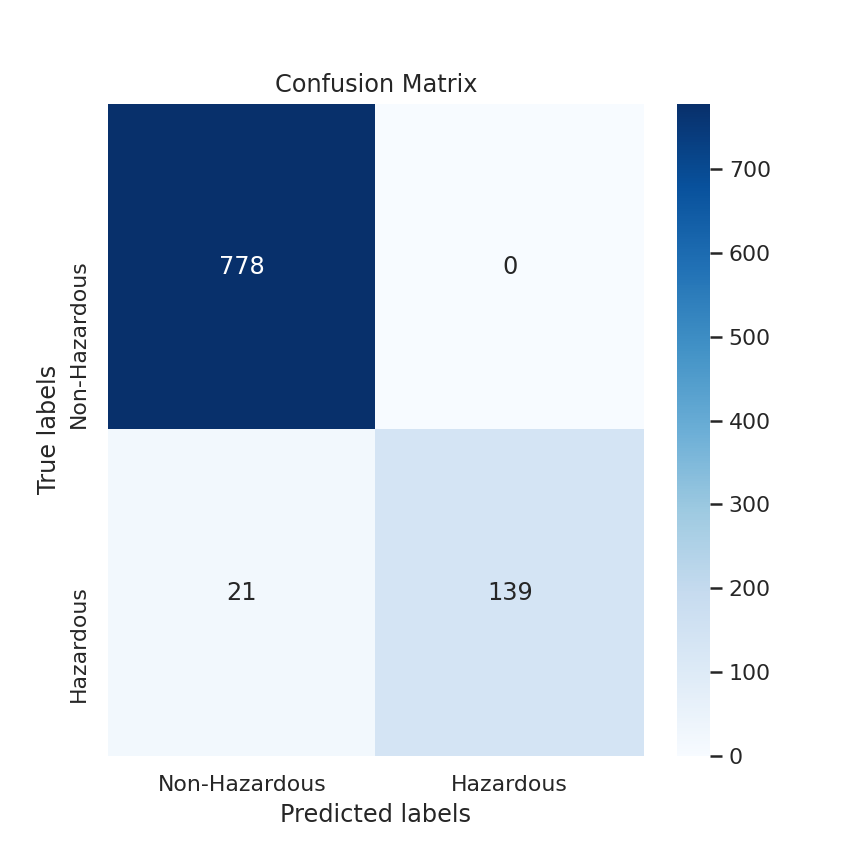

In [83]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_et)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [98]:
et_score = cross_val_score(et_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')
et_scores = et_score.mean()
et_scores

0.9737360256220663

### Gradient boosting Classifier

#### Fit on training data and predict on test data

In [85]:
gb_classifier = GradientBoostingClassifier(max_depth = None, n_estimators = 100)

gb_classifier.fit(X_train, y_train)

y_hat_gb = gb_classifier.predict(X_test)

#### Classification report

In [86]:
class_report = classification_report(y_test, y_hat_gb, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.991083,1.000000,0.992537,0.995541,0.992604
recall,1.000000,0.956250,0.992537,0.978125,0.992537
f1-score,0.995521,0.977636,0.992537,0.986579,0.992471
support,778.000000,160.000000,0.992537,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


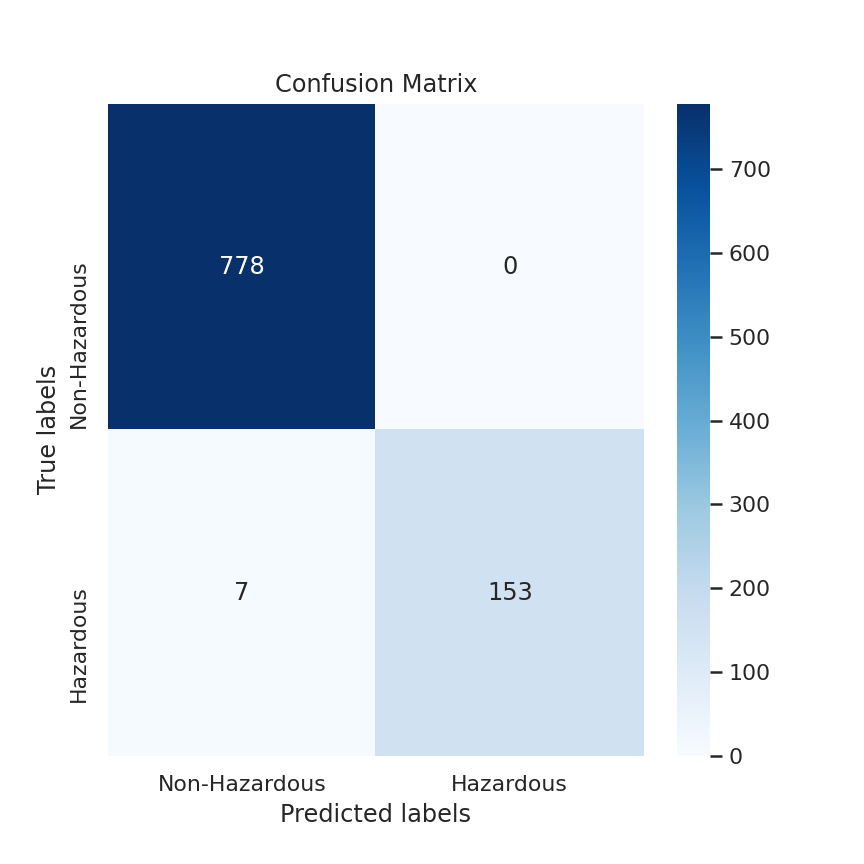

In [87]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_gb)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [99]:
gb_score = cross_val_score(gb_classifier, X_train, y_train, cv=kfold, scoring="f1_weighted")
gb_scores = gb_score.mean()
gb_scores

0.9951816316667464

### AdaBoost Classifier

#### Fit on training data and predict on test data

In [100]:
ab_classifier = AdaBoostClassifier(n_estimators = 100)

ab_classifier.fit(X_train, y_train)

y_hat_ab = ab_classifier.predict(X_test)

#### Classification report

In [101]:
class_report = classification_report(y_test, y_hat_ab, output_dict=True)
pd.DataFrame(class_report)

,0,1,accuracy,macro avg,weighted avg
precision,0.989822,1.000000,0.991471,0.994911,0.991558
recall,1.000000,0.950000,0.991471,0.975000,0.991471
f1-score,0.994885,0.974359,0.991471,0.984622,0.991384
support,778.000000,160.000000,0.991471,938.000000,938.000000


#### Confusion matrix

<IPython.core.display.Javascript object>


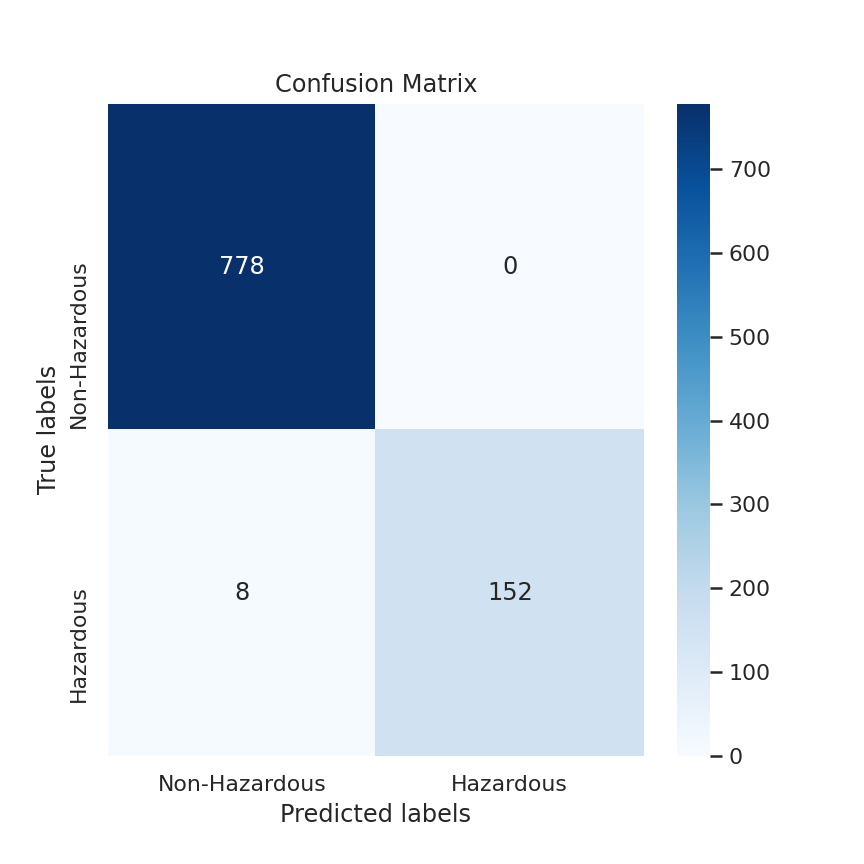

In [102]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_ab)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

#### Cross-validation

In [ ]:
ab_score = cross_val_score(ab_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')
ab_scores = ab_score.mean()
ab_scores

## XGBOOST

### Initialize XGBoost classifier object

In [ ]:
print(xgb.__version__)

# Dictionary with default parameters, not used
param = {'base_score': 0.5,
         'booster': 'gbtree',
         'colsample_bylevel': 1,
         'colsample_bynode': 1,
         'colsample_bytree': 1,
         'gamma': 0,
         'grow_policy': 'depthwise',
         'learning_rate': 0.1,
         'max_delta_step': 0,
         'max_depth': None,
         'min_child_weight': 1,
         'missing': 'nan',
         'n_estimators': 100,
         'num_parallel_tree': 1,
         'objective': 'binary:logistic',
         'process_type': 'default',
         'predictor': 'auto',
         'reg_alpha': 0,
         'reg_lambda': 1,
         'sampling_method': 'uniform',
         'sketch_eps' : 0.03,
         'scale_pos_weight': 1,
         'seed': 0,
         'silent': 1,
         'subsample': 1,
         'tree_method': 'auto',
         'updater': 'grow_colmaker,prune'
        }


# Weighing for imbalanced labels scale_pos_weight = total_negative_examples / total_positive_examples
weight_unbal_xgb = 3932/(4687-3932)

# Creation of classification object
xgb_classifier = xgb.XGBClassifier(eta=0.1, 
                                   objective='binary:logistic',
                                   #num_class = 2,
                                   use_label_encoder=False, 
                                   max_depth=4, 
                                   colsample_bytree=0.8,
                                   subsample=0.8,
                                   scale_pos_weight=weight_unbal_xgb,
                                   gamma=0,
                                   reg_lambda=1,
                                   reg_alpha=0,
                                   n_estimators=100
                                   )
xgb_classifier

### Fit on training data and predict on test data

In [ ]:
xgb_classifier.fit(X_train,y_train)

y_hat_xgb = xgb_classifier.predict(X_test)

### Classification report

In [ ]:
class_report = classification_report(y_test, y_hat_xgb, output_dict=True)
pd.DataFrame(class_report)

### Plot boosted tree model

In [ ]:
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print("RMSE: %f" % (rmse))

plt.rcParams['figure.figsize'] = [14, 14]

xgb.plot_tree(xgb_classifier, show_node_id = True)

plt.show()

### Importance of features

In [ ]:
plt.rcParams['figure.figsize'] = [14, 14]

xgb.plot_importance(xgb_classifier)

plt.show()

### Confusion matrix

In [ ]:
plt.rcParams['figure.figsize'] = [6, 6]

fig, ax = plt.subplots()

cm = confusion_matrix(y_test, y_hat_xgb)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d'); 

ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']); ax.yaxis.set_ticklabels(['Non-Hazardous', 'Hazardous']);

plt.show()

### Cross validation

In [ ]:
xgb_score = cross_val_score(xgb_classifier, X_train, y_train, cv=kfold, scoring='f1_weighted')
xgb_scores = xgb_score.mean()
xgb_scores